# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file =  "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

(array([  30.,  240.,  240.,  150.,  210.,  210.,   60.,  150.,  150.,
         150.,  210.,  150.,  210.,  240.,   90.,   90.,   60.,  120.,
         120.,   30.,   60.,   60.,   60.,   60.,   30.,  150.,   60.,
          30.,   60.,   30.,   60.,   90.,   30.,   90.,   60.,  120.,
          60.,   30.,  210.,   30.,   60.,   30.,   30.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

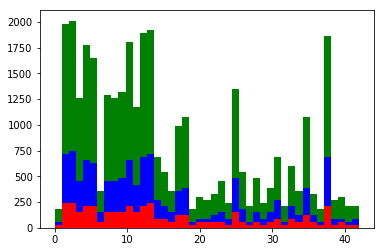

In [3]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
# a Histogram for each of y_train , y_test , y_valid with different colors
# From the result it appears that the set has different numbers of data elements for each class ,
# but the representation of each class in the 3 categories (training ,testing ,validation ) is so far the same 
# compared with the same class in the other categories.
%matplotlib inline

plt.hist(y_train, bins=n_classes, color='green')
plt.hist(y_test, bins=n_classes, color='blue')
plt.hist(y_valid, bins=n_classes, color='red')

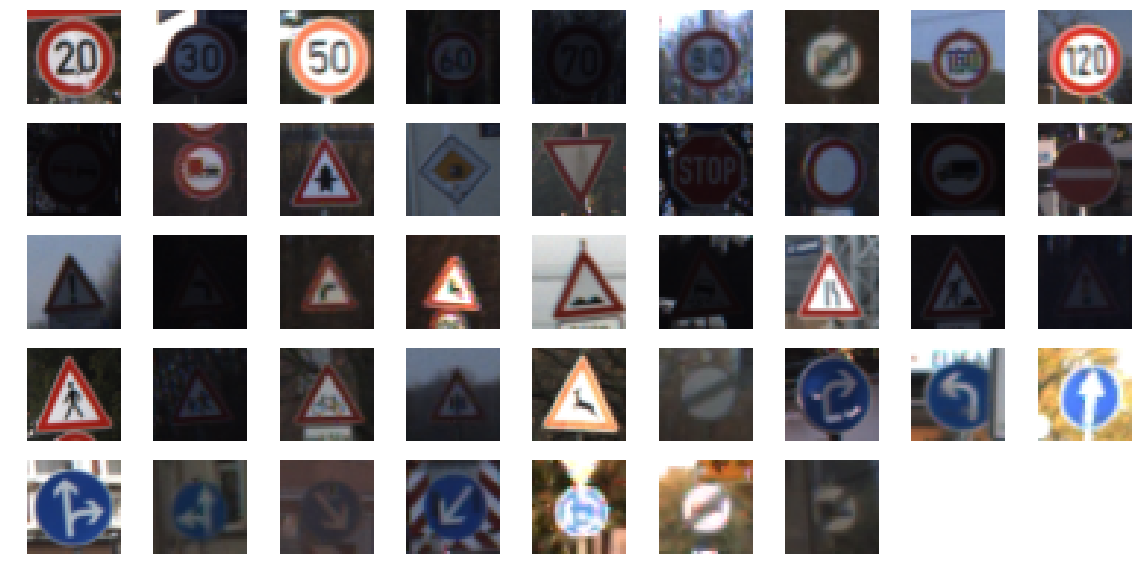

In [4]:
# Displaying a random image from each class wach time the code is run .

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (20, 10)
for i in np.unique(y_train):
    plt.subplot(5,9,i+1)
    l = np.where(y_train==i)
    pic_id = np.random.choice(l[0])
    pic = X_train[pic_id].squeeze()
    if i==22:
        selected_pic=pic
    label = i
    img = plt.imshow(pic)
    plt.axis('off')
    

----

## Visualize Grayscal images


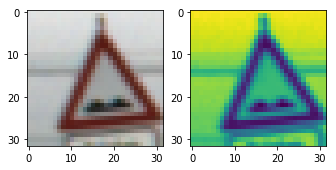

In [5]:
import cv2
plt.subplot(1,7,1)
img = plt.imshow(selected_pic)
plt.subplot(1,7,2)
gray= cv2.cvtColor(selected_pic, cv2.COLOR_BGR2GRAY)
img = plt.imshow(gray)
    

----

## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)

In [6]:
### Preprocess the data here. It is required to normalize the data ,converting to grayscale.
import cv2

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
#    return (data -128 )/128.0
    return data / 255 * 0.8 + 0.1

# A loop for a set of data to convert them to grayscale and return them as a
def GrayScale(data):
    gray_images = []
    for image in data:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
        
    return np.array(gray_images)


### Model Architecture

In [7]:
from numpy import newaxis

# Preprocessing process: Iterate through GrayScale 
# Add an axis because converting to grayscale removed an axis
# Do normalize
print("training data shape before GrayScale=", X_train.shape)
X_train = GrayScale(X_train)
print("training data shape after GrayScale =", X_train.shape)
X_train = X_train[..., newaxis]
print("training data shape =", X_train.shape)
X_train = normalize(X_train) 



# Preprocessing process for test_data
X_test = GrayScale(X_test)
X_test = X_test[..., newaxis]
X_test = normalize(X_test) 

print("testing data shape =", X_test.shape)


# Preprocessing process for validation_data
X_valid = GrayScale(X_valid)
X_valid = X_valid[..., newaxis]
X_valid = normalize(X_valid) 

print("validation data shape =",  X_valid.shape)


training data shape before GrayScale= (34799, 32, 32, 3)
training data shape after GrayScale = (34799, 32, 32)
training data shape = (34799, 32, 32, 1)
testing data shape = (12630, 32, 32, 1)
validation data shape = (4410, 32, 32, 1)


In [13]:

### Architecture :

## Using 5 layers:
# Layer 1: Convolutional.  Input = 32x32x1. Output = 28x28x6.
# Activation for layer 1 (relu)
# Pooling. Input = 28x28x6. Output = 14x14x6.

#Layer 2: Convolutional. Output shape : 10x10x16.
# Activation for layer 2 (relu)
# Pooling. Input = 10x10x16. Output = 5x5x16.

#Flatten. Flatten last output shape to 1D instead of 3D.(5*5*16  TO 400)

# Layer 3: Fully Connected 1. Input = 400. Output = 300.
# Activation for layer 3 (relu)
# Dropout with "keep_prob" to prevent overfitting

# Layer 4: Fully Connected 2. Input = 300. Output = 150.
# Activation for layer 4 (relu)
# Dropout with "keep_prob" to prevent overfitting

# Layer 5: Fully Connected 3. Input = 150. Output = 43 (Logits)

import tensorflow as tf
tf.reset_default_graph()

EPOCHS = 50
BATCH_SIZE = 100

from tensorflow.contrib.layers import flatten

def neural_network(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias
    c1_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 1, 6), mean = mu, stddev = sigma))
    c1_bias = tf.Variable(tf.zeros(6))
    # Apply convolution
    conv_layer1 = tf.nn.conv2d(x, c1_weight, strides=[1, 1, 1, 1], padding='VALID') + c1_bias    
    # Activation for layer 1
    conv_layer1 = tf.nn.relu(conv_layer1) 
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_layer1 = tf.nn.avg_pool(conv_layer1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    # Weight and bias
    c2_weight = tf.Variable(tf.truncated_normal(shape = (5, 5, 6, 16), mean = mu, stddev = sigma))
    c2_bias = tf.Variable(tf.zeros(16))
    # Apply convolution for layer 2
    conv_layer2 = tf.nn.conv2d(conv_layer1, c2_weight, strides=[1, 1, 1, 1], padding='VALID') + c2_bias  
    # Activation for layer 2
    conv_layer2 = tf.nn.relu(conv_layer2)  
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_layer2 = tf.nn.avg_pool(conv_layer2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten to get to fully connected layers. Input = 5x5x16. Output = 400.
    flat = tf.contrib.layers.flatten(conv_layer2)
    
    # Layer 3: Fully Connected 1. Input = 400. Output = 300.
    # Weight and bias
    fc1_weight = tf.Variable(tf.truncated_normal(shape = (400, 300), mean = mu, stddev = sigma))
    fc1_bias = tf.Variable(tf.zeros(300))
    fc1 = tf.matmul(flat, fc1_weight) + fc1_bias # Matrix multiplication instead of 2D convolution  
    # Activation for the first fully connected layer.
    fc1 = tf.nn.relu(fc1)   
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected 2. Input = 300. Output = 150.
    # Same as the fc1 layer, just with updated output numbers
    fc2_weight = tf.Variable(tf.truncated_normal(shape = (300, 150), mean = mu, stddev = sigma))
    fc2_bias = tf.Variable(tf.zeros(150))
    # Again, matrix multiplication
    fc2 = tf.matmul(fc1, fc2_weight) + fc2_bias   
    # Activation.
    fc2 = tf.nn.relu(fc2)    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5 Fully Connected 3 . Input = 150. Output = 43.
    # Since this is the final layer, output needs to match up with the number of classes
    fc3_weight = tf.Variable(tf.truncated_normal(shape = (150, 43), mean = mu, stddev = sigma))
    fc3_bias = tf.Variable(tf.zeros(43))
    # Again, matrix multiplication
    logits = tf.matmul(fc2, fc3_weight) + fc3_bias
    
    return logits

In [14]:
# Set placeholder variables for x, y, and the keep_prob for dropout
# Also, one-hot encode y
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [15]:
rate = 0.003
logits = neural_network(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
# The below is used in the validation part of the neural network
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy =  sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
from sklearn.utils import shuffle
save_file = './train_model.ckpt'
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        print (X_train.shape , y_train.shape)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 0.7})
      
        training_accuracy = evaluate(X_train, y_train)   
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    testing_accuracy = evaluate(X_test, y_test)        
    print("test Accuracy = {:.3f}".format(testing_accuracy))
    print()        
        
    # Save the model
    save_path=saver.save(sess, save_file)
    print('Trained Model Saved.')

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

(34799, 32, 32, 1) (34799,)
EPOCH 1 ...
Training Accuracy = 0.858
Validation Accuracy = 0.801

(34799, 32, 32, 1) (34799,)
EPOCH 2 ...
Training Accuracy = 0.943
Validation Accuracy = 0.877

(34799, 32, 32, 1) (34799,)
EPOCH 3 ...
Training Accuracy = 0.961
Validation Accuracy = 0.898

(34799, 32, 32, 1) (34799,)
EPOCH 4 ...
Training Accuracy = 0.977
Validation Accuracy = 0.925

(34799, 32, 32, 1) (34799,)
EPOCH 5 ...
Training Accuracy = 0.983
Validation Accuracy = 0.924

(34799, 32, 32, 1) (34799,)
EPOCH 6 ...
Training Accuracy = 0.986
Validation Accuracy = 0.915

(34799, 32, 32, 1) (34799,)
EPOCH 7 ...
Training Accuracy = 0.988
Validation Accuracy = 0.927

(34799, 32, 32, 1) (34799,)
EPOCH 8 ...
Training Accuracy = 0.991
Validation Accuracy = 0.931

(34799, 32, 32, 1) (34799,)
EPOCH 9 ...
Training Accuracy = 0.994
Validation Accuracy = 0.928

(34799, 32, 32, 1) (34799,)
EPOCH 10 ...
Training Accuracy

In [43]:
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_test, y: y_test, keep_prob : 1.0})

print('Test Accuracy: {}'.format(test_accuracy))


Test Accuracy: 0.9373713135719299


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.




### Load and Output the Images

sign_name:  Go straight or left , sign_class:  37
sign_name:  General caution , sign_class:  18
sign_name:  Speed limit (60km/h) , sign_class:  3
sign_name:  Turn left ahead , sign_class:  34
sign_name:  Yield , sign_class:  13


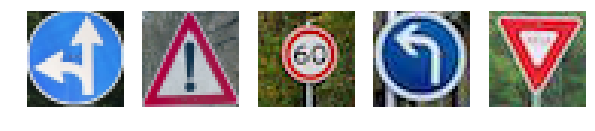

In [34]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pandas as pd
import cv2
# Importing the images, and let's take a look at what we have!
import os
import matplotlib.image as mpimg
add_pics = sorted(os.listdir("testing_images/"))
add_pics = add_pics[0:5]
plt.figure(figsize=(10,4))
# Show the images, add to a list to process for classifying
add_pics_data = []
j=0
sign_names = pd.read_csv('signnames.csv')

real_class=[37,18,3,34,13]
for i in add_pics:
    print ("sign_name: ",sign_names.loc[real_class[j]].SignName , ", sign_class: ",sign_names.loc[real_class[j]].ClassId)
    j+=1
    grid=plt.subplot(1,5,j)
    i = 'testing_images/' + i
    image = mpimg.imread(i)
#    print (image.shape)
    newx,newy = 32,32 #image.shape[1]/4,image.shape[0]/4 #new size (w,h)
    newimage = cv2.resize(image,(int(newx),int(newy)))
#    print (newimage.shape)
    add_pics_data.append(newimage)
    grid.imshow(newimage)
    plt.axis('off')

plt.show()




### Preprocessing test_images

In [35]:
# Make into numpy array for processing
add_pics_data = np.array(add_pics_data)
print('Preprocessing additional pictures...')
# Preprocessing process: Iterate through GrayScale 
# Add an axis because converting to grayscale removed an axis
# Normalize
add_pics_data = GrayScale(add_pics_data)
add_pics_data = add_pics_data[..., newaxis]
add_pics_data = normalize(add_pics_data) 

new_image_shape = add_pics_data.shape
print("Processed additional pictures shape =", new_image_shape)

Preprocessing additional pictures...
Processed additional pictures shape = (5, 32, 32, 1)


### Predict the Sign Type for Each Image , Caluculating Accuracy

In [41]:
with tf.Session() as sess:
    saver.restore(sess, save_file)
    new_pics_classes = sess.run(tf.nn.softmax(logits), feed_dict={x: add_pics_data, keep_prob : 1.0})
    test_accuracy=evaluate(add_pics_data,real_class)

print (new_pics_classes)
print (test_accuracy)

[[  8.89317370e-11   1.22117950e-03   1.65854990e-01   1.89311933e-02
    4.68865852e-04   2.68214375e-01   6.95950621e-13   2.57486590e-05
    2.78991865e-06   1.06551779e-05   7.94278676e-05   4.86724079e-04
    1.98914646e-03   1.05747196e-03   3.74796372e-08   1.58185358e-04
    8.02611866e-11   4.44388668e-08   4.81807292e-01   5.14099549e-04
    6.37558969e-07   3.62664759e-05   4.30072078e-07   1.75807436e-05
    8.37116477e-06   1.52375372e-02   7.61874078e-04   1.54196733e-09
    8.14895259e-07   1.08209241e-03   1.11694965e-06   3.62595171e-02
    1.28584990e-10   1.96493829e-06   7.10123658e-08   9.38202647e-05
    2.82953252e-08   1.16020565e-05   1.82669552e-04   5.14997309e-03
    3.31477611e-04   1.43644319e-10   1.80826187e-10]
 [  7.15795409e-11   1.09540788e-03   1.14729993e-01   1.62482187e-02
    4.61799427e-05   1.36805907e-01   2.76187883e-12   1.04323135e-05
    2.08231404e-06   3.45880517e-06   2.80457134e-05   2.97721988e-03
    2.21944740e-03   7.80979171e-04 

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [42]:
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
print (predicts)
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])
    print ("Real sign name", sign_names.loc[real_class[i]].SignName, ", Real sign class ", sign_names.loc[real_class[i]].ClassId)
    print ("------------------------------------")

TopKV2(values=array([[  4.81807292e-01,   2.68214375e-01,   1.65854990e-01,
          3.62595171e-02,   1.89311933e-02],
       [  6.19779706e-01,   1.36805907e-01,   1.14729993e-01,
          6.66245222e-02,   3.27161290e-02],
       [  9.00807619e-01,   3.70311737e-02,   3.14642042e-02,
          1.24747595e-02,   8.60435795e-03],
       [  9.99952435e-01,   4.54503606e-05,   1.48997003e-06,
          7.36304628e-07,   1.17560562e-11],
       [  1.00000000e+00,   3.21964980e-24,   2.24095039e-30,
          1.81391074e-31,   1.26817009e-31]], dtype=float32), indices=array([[18,  5,  2, 31,  3],
       [18,  5,  2, 31, 25],
       [ 2, 10,  9,  8,  5],
       [38, 34, 32, 14,  3],
       [13, 38, 15, 28, 12]], dtype=int32))
Image 0 probabilities: [ 0.48180729  0.26821437  0.16585499  0.03625952  0.01893119] 
 and predicted classes: [18  5  2 31  3]
Real sign name Go straight or left , Real sign class  37
------------------------------------
Image 1 probabilities: [ 0.61977971  0.136805